In [1]:
# precondition
!pip install folium
!pip install bokeh
!pip install ipywidgets
!pip install matplotlib

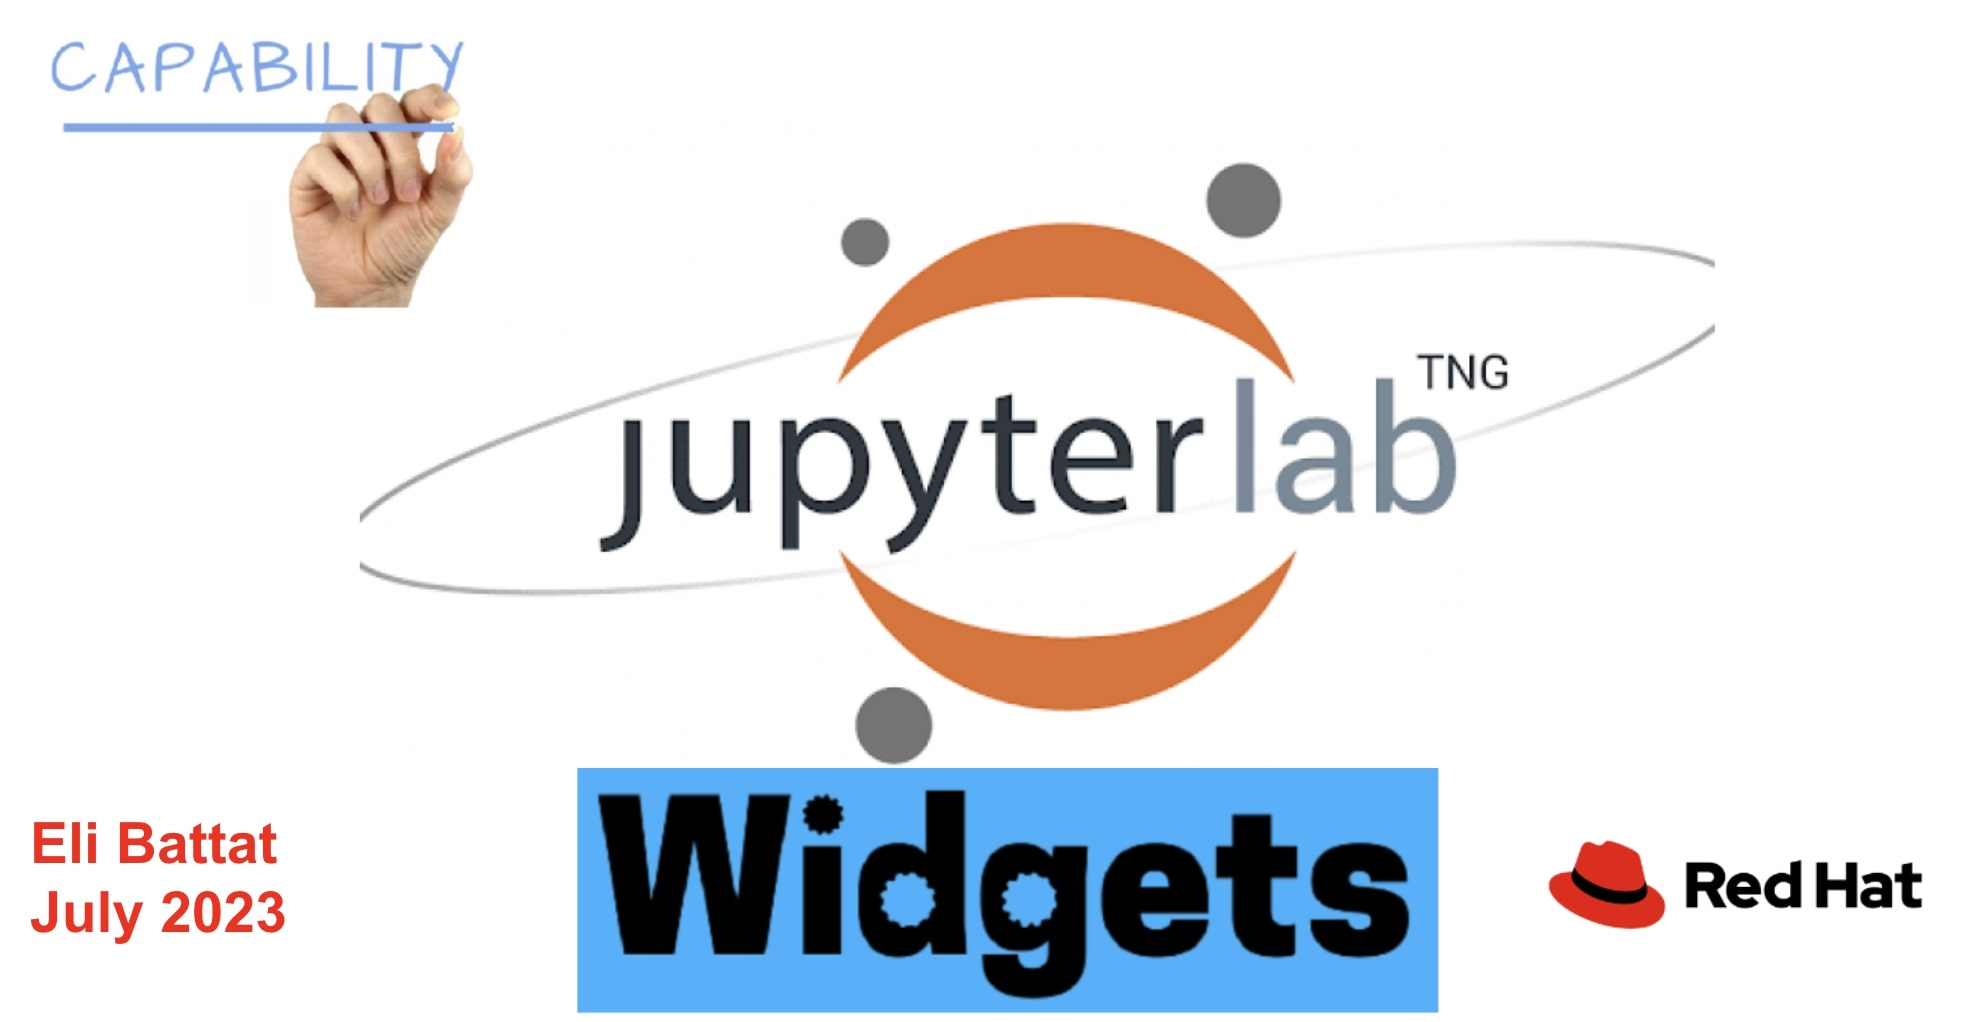

In [2]:
# Jupyter notebook overview inside sagemaker

from IPython.display import Image
Image("img/jupyter.jpg")


---


Agenda:

* [Jupyterlab Notebook Overview](#JupyterLab-Notebook-Overview)
    
* [Jupyterlab Widgets Overview](#Jupyterlab-Widgets-Overview)

* [Jupyterlab Visualization Overview](#Jupyterlab-Visualization-Overview)

* [PerfCI Logs Analyzer](#Perfci-Logs-Analyzer)   
---  
    
    


---

# <a name="JupyterLab-Notebook-Overview"></a>JupyterLab Notebook Overview

  ## Project Jupyter released in 2014, continuous of IPython Project
    
  ## Project Jupyter is a non-profit, open-source project
    
  ## The name comes from core languages: Julia, Python and R

  ## Jupyter Notebook is cell oriented flow  

  ## Main purpose: Minimize the “distance” between USER to DATA
  

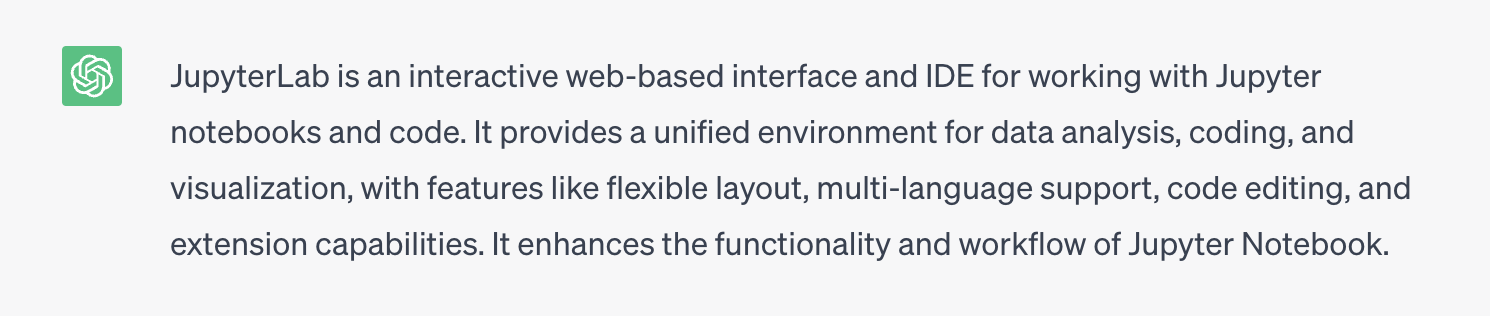

In [47]:
# ChatGPT description

from IPython.display import Image
Image("img/ChatGPT.png")

---

# <a name="Jupyterlab-Widgets-Overview"></a>Jupyterlab Widgets Overview

In [4]:
# Widget
# Why does displaying the same widget twice work?
# Widgets are represented in the back-end by a single object. Each time a widget is displayed, 
# a new representation of that same object is created in the front-end. These representations are called views.
## ipywidgets -  enable interactive data visualization in the Jupyter notebooks.
from IPython.display import IFrame

IFrame(src='https://miro.medium.com/v2/resize:fit:1400/1*3Gz1J2iyddYiL_uJTmZjXg.png', width=1000, height=500)

### ipywidgets is a Python library for creating interactive widgets in Jupyter notebooks.

## Simple widgets

In [27]:
import ipywidgets as widgets
# IntSlider horizontal
int_slider = widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='VMs:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(int_slider)

IntSlider(value=7, continuous_update=False, description='VMs:', max=10)

In [28]:
#IntRangeSlider
int_range_slider = widgets.IntRangeSlider(
    value=[5, 7],
    min=0,
    max=10,
    step=1,
    description='VMs:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
display(int_range_slider)

IntRangeSlider(value=(5, 7), continuous_update=False, description='VMs:', max=10)

In [29]:
#IntText
int_text = widgets.IntText(
    value=7,
    description='VMs:',
    disabled=False
)
display(int_text)

IntText(value=7, description='VMs:')

In [6]:
#ToggleButton
toggle_button = widgets.ToggleButton(
    value=False,
    description='Start VM',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon=''
)
display(toggle_button)

ToggleButton(value=False, description='Start VM', tooltip='Description')

In [30]:
#Checkbox
widgets.Checkbox(
    value=False,
    description='Check me',
    disabled=False
)

Checkbox(value=False, description='Check me')

In [31]:
# Dropdown
widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=False,
)

Dropdown(description='Number:', index=1, options=('1', '2', '3'), value='2')

In [32]:
#RadioButtons
widgets.RadioButtons(
    options=['POD', 'KATA', 'VM'],
    value='VM',
    description='Type: ',
    disabled=False
)

RadioButtons(description='Type: ', index=2, options=('POD', 'KATA', 'VM'), value='VM')

In [8]:
#Select
widgets.Select(
    options=['POD', 'KATA', 'VM'],
    value='VM',
    # rows=10,
    description='TYPE:',
    disabled=False
)

Select(description='TYPE:', index=2, options=('POD', 'KATA', 'VM'), value='VM')

In [35]:
#widgets.Textarea
widgets.Textarea(
    value='Hello Perf department',
    placeholder='Type something',
    description='String:',
    disabled=False
)

Textarea(value='Hello Perf department', description='String:', placeholder='Type something')

In [7]:
# Updating a widget in the background - threading
import threading
from IPython.display import display
import ipywidgets as widgets
import time
progress = widgets.FloatProgress(value=0.0, min=0.0, max=1.0)

def work(progress):
    total = 10
    for i in range(total):
        time.sleep(0.2)
        progress.value = float(i+1)/total

thread = threading.Thread(target=work, args=(progress,))
display(progress)
thread.start()

FloatProgress(value=0.0, max=1.0)

In [36]:
# Play (Animation) widget
play = widgets.Play(
    #interval=10,
    value=1,
    min=0,
    max=100,
    step=1,
    description="Press play",
    disabled=False
)
      

slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
play = widgets.HBox([play, slider])
display(play)

In [37]:
# DatePicker
widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

DatePicker(value=None, description='Pick a Date', step=1)

In [38]:
#ColorPicker
widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

ColorPicker(value='blue', description='Pick a color')

In [39]:
#ToggleButtons
toggle_button = widgets.ToggleButtons(
    options=['Pod', 'kata', 'VM'],
    description='TYPE:',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of pod', 'Description of kata', 'Description of vm'],
#     icons=['check'] * 3
)
colors= {0:'success', 1:'info', 2:'warning', 3:'danger', 4:''}
def on_click(change):
    print('pressed: '  + change['new'])
    toggle_button.button_style='info'
    
display(toggle_button)
toggle_button.observe(on_click, 'value')

ToggleButtons(button_style='success', description='TYPE:', options=('Pod', 'kata', 'VM'), tooltips=('Descripti…

## Complex widgets

In [42]:
# Nesting tabs and accordions

tab_nest = widgets.Tab()
tab_nest.children = [accordion, accordion,accordion]
tab_nest.set_title(0, 'Hyper parameter')
tab_nest.set_title(1, 'Train')
tab_nest.set_title(2, 'validation')
tab_nest

In [41]:
#Tabs

tab_contents = ['Model1', 'Model2', 'Model3', 'Model4', 'Model5']
children = [widgets.Text(description=name) for name in tab_contents]
tab = widgets.Tab()
tab.children = children
for i in range(len(children)):
    tab.set_title(i, 'model' + str(i+1))
tab

In [11]:
#box layout
from ipywidgets import Layout, Button, Box

items_layout = Layout( width='auto')     # override the default width of the button to 'auto' to let the button grow

box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    border='solid',
                    width='20%')

words = [ 'm5.large','m5.xlarge', 'm5.2xlarge', 'm5.4xlarge']
items = [Button(description=word, layout=items_layout, button_style='danger') for word in words]
box = Box(children=items, layout=box_layout)
box

Box(children=(Button(button_style='danger', description='m5.large', layout=Layout(width='auto'), style=ButtonS…

In [44]:
# carousel
from ipywidgets import Layout, Button, Box, VBox

item_layout = Layout(height='100px', min_width='100px')
items = [Button(layout=item_layout, description='model_' + str(i), button_style='warning') for i in range(40)]
box_layout = Layout(overflow_x='scroll',
                    border='3px solid black',
                    width='500px',
                    height='',
                    flex_flow='row',
                    display='flex')
carousel = Box(children=items, layout=box_layout)
VBox([Label('Models store:'), carousel])

In [45]:
#form
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between',
    width='auto'
)

form_items = [
    Box([Label(value='Number of ec2'), IntSlider(min=40, max=60)], layout=form_item_layout),
    Box([Label(value='Size'),
         Dropdown(options=['large', 'xlarge', '2xlarge','4xlarge'])], layout=form_item_layout),
    Box([Label(value='Model name'),
         FloatText()], layout=form_item_layout),
    Box([Label(value='Description'),
         Textarea()], layout=form_item_layout)
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='400px'
))
form

Box(children=(Box(children=(Label(value='Number of ec2'), IntSlider(value=40, max=60, min=40)), layout=Layout(…

In [46]:
#GridBox
from ipywidgets import Button, GridBox, Layout, ButtonStyle

header  = Button(description='Workloads',
                 layout=Layout(width='auto', grid_area='header'),
                 style=ButtonStyle(button_color='lightblue'))
main    = Button(description='Vdbench',
                 layout=Layout(width='auto', grid_area='main'),
                 style=ButtonStyle(button_color='moccasin'))
sidebar = Button(description='Bootstorm',
                 layout=Layout(width='auto', grid_area='sidebar'),
                 style=ButtonStyle(button_color='salmon'))
footer  = Button(description='Benchmark-runner framework',
                 layout=Layout(width='auto', grid_area='footer'),
                 style=ButtonStyle(button_color='olive'))

GridBox(children=[header, main, sidebar, footer],
        layout=Layout(
            width='75%',
            grid_template_rows='auto auto auto',
            grid_template_columns='25% 25% 25% 25%',
            grid_template_areas='''
            "header header header header"
            "main main . sidebar "
            "footer footer footer footer"
            ''')
       )

GridBox(children=(Button(description='Workloads', layout=Layout(grid_area='header', width='auto'), style=Butto…

---

# <a name="Jupyterlab-Visualization-Overview"></a>Jupyterlab Visualization Overview

#  The Python Visualization Landscape


![Python Landscape](./img/python_viz_landscape.png)


# Motivation


|Not This|This|
|:--------------------------:|:-----------------------------------------:|
|![from](img/matplotlib_barchart.png)  |  ![to](img/pixijs-jupyterlab.gif)|

## Matplotlib Library

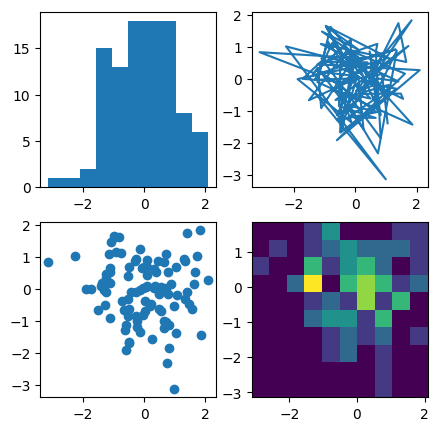

In [14]:
# Sample plots in Matplotlib
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])

plt.show()

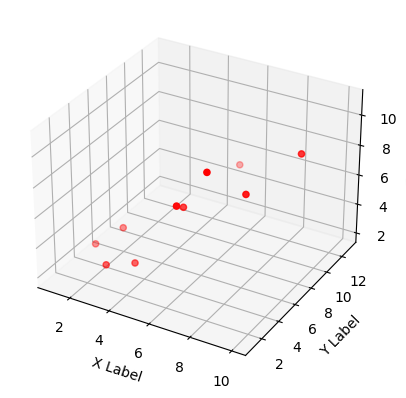

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# JavaScript Libraries

## GEOlocations: folium


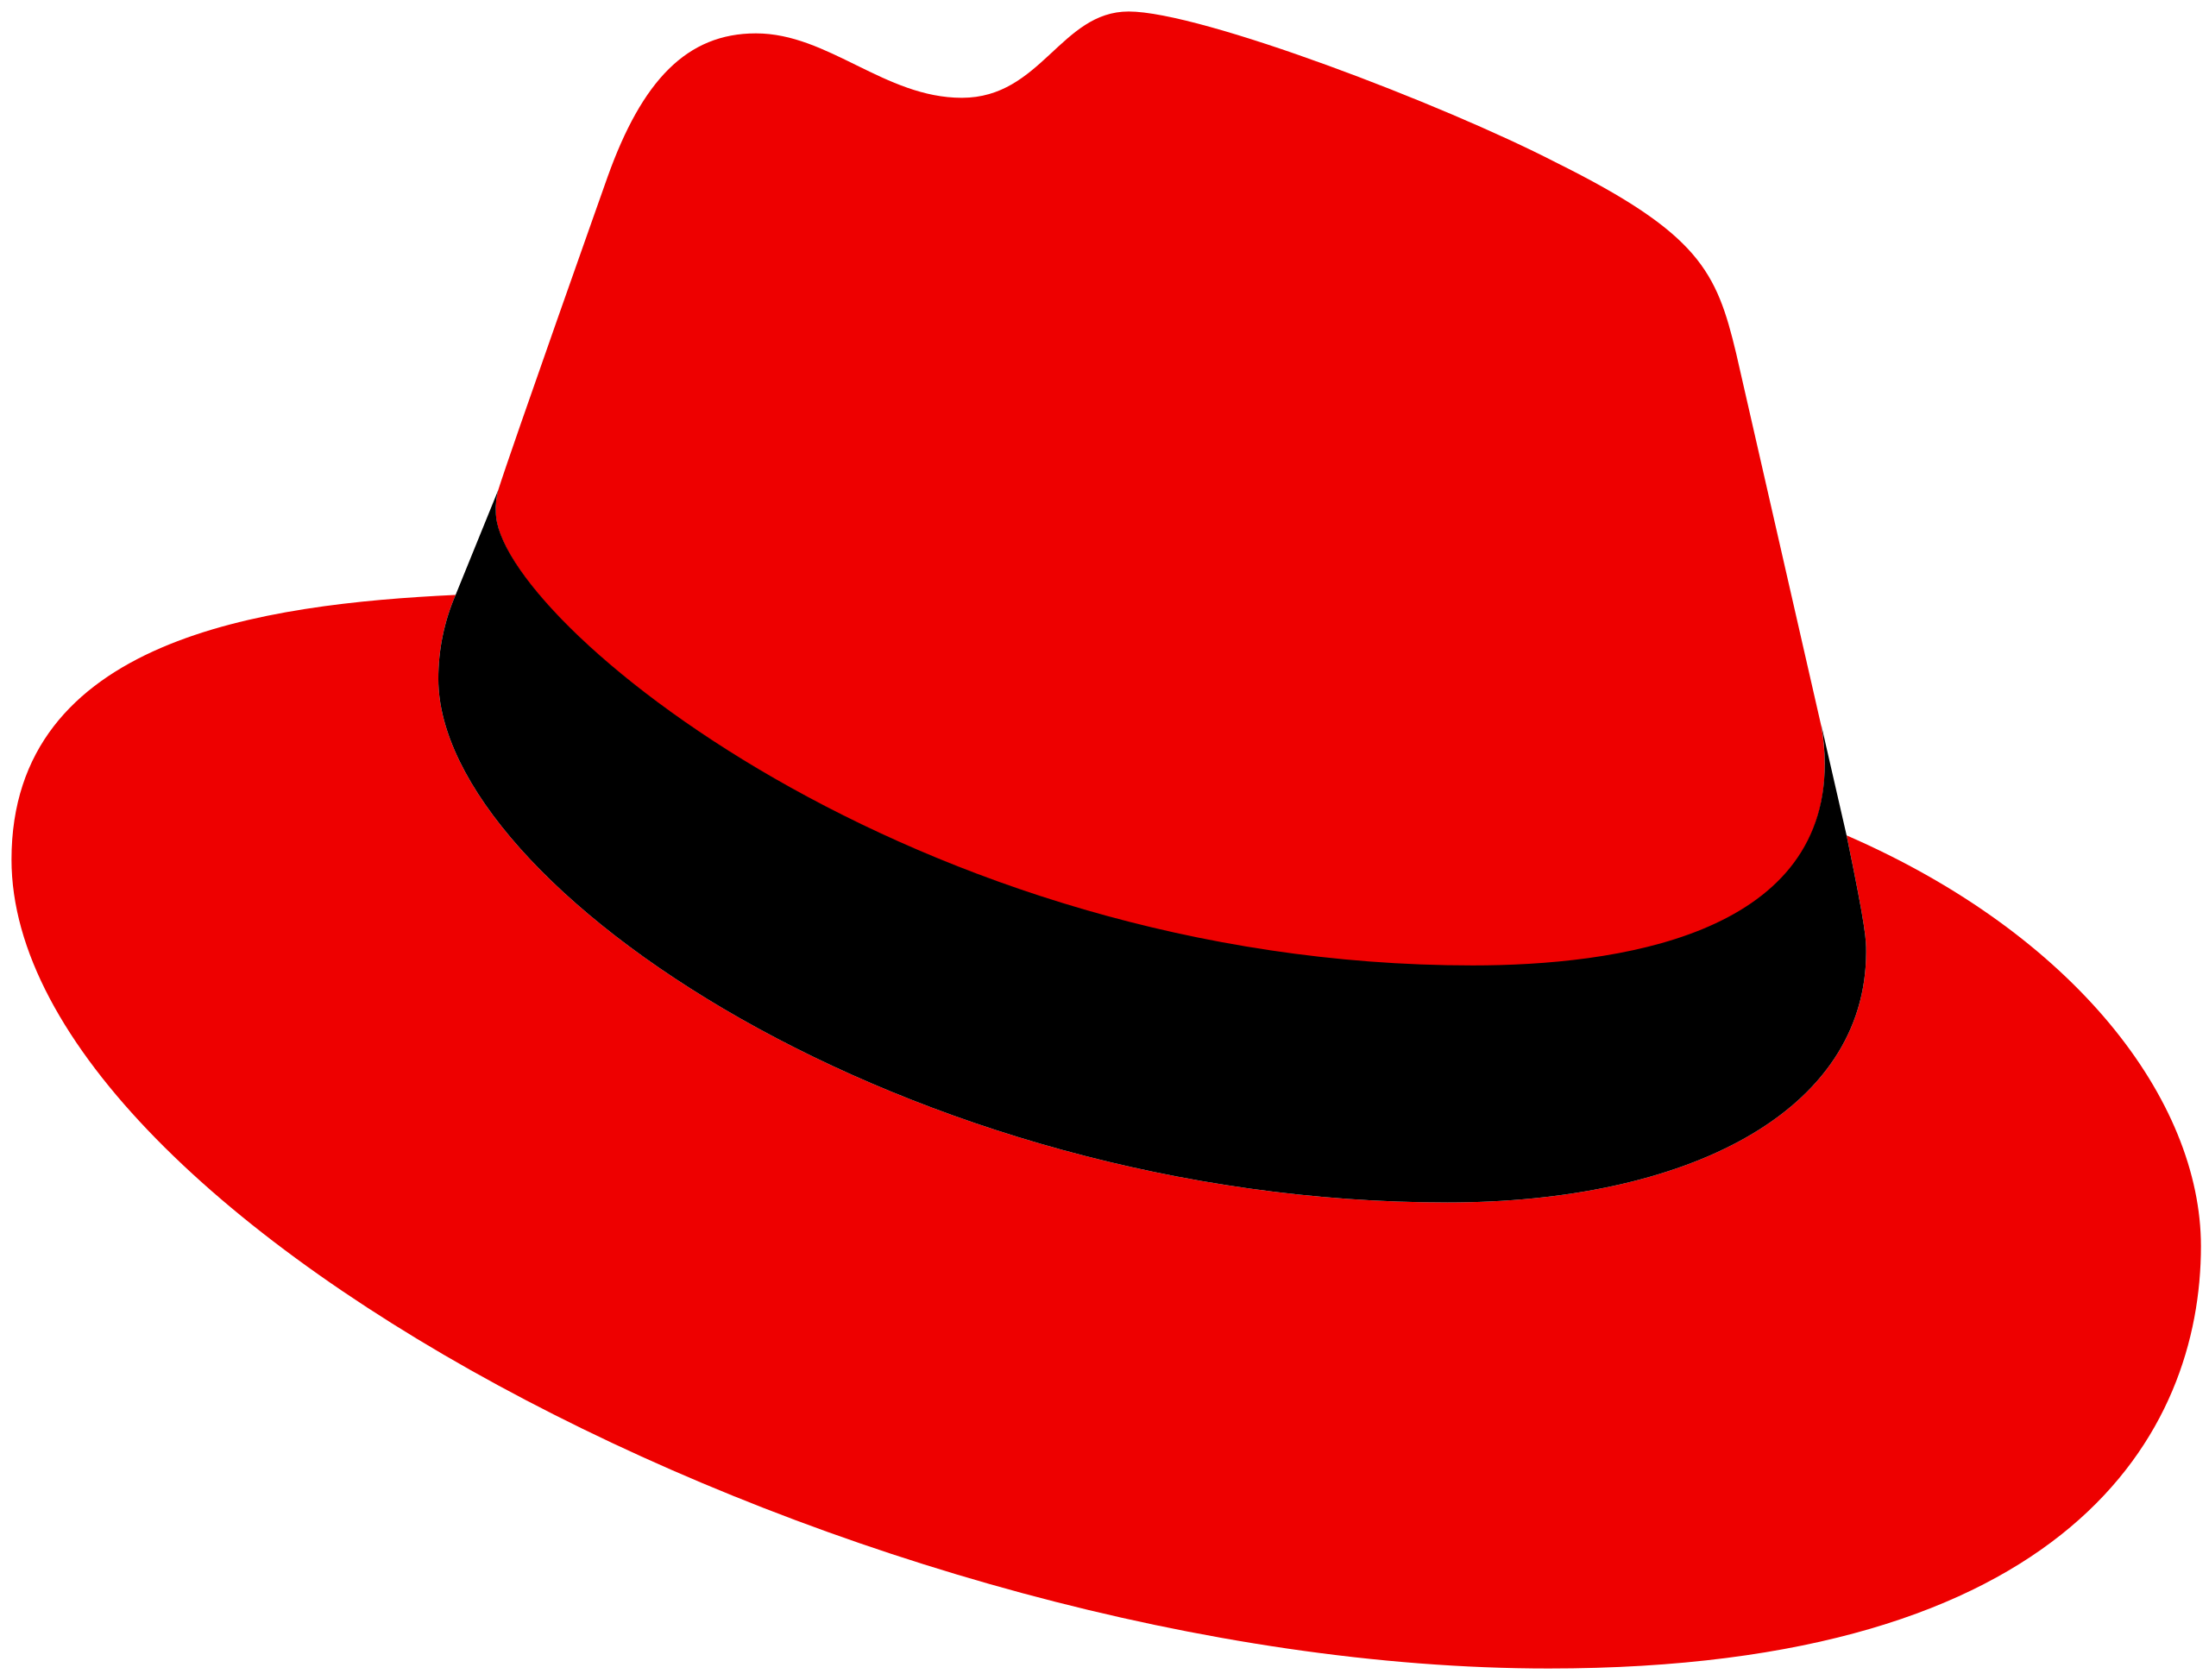
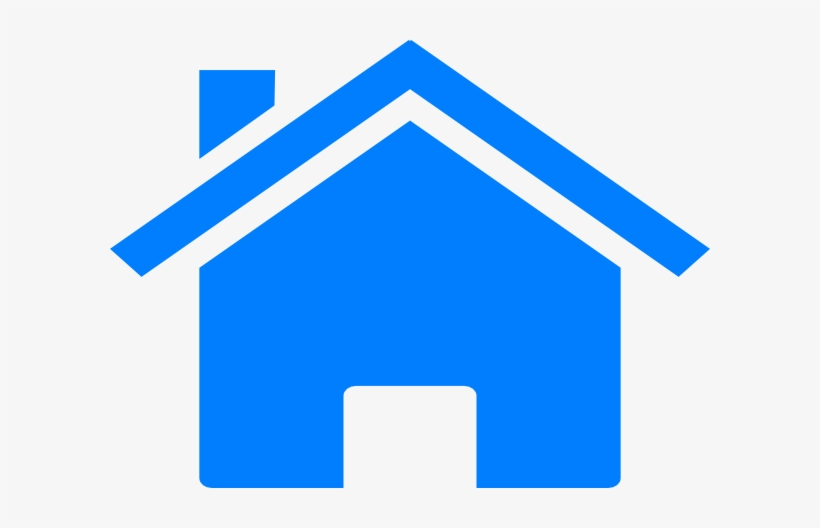

In [16]:
import folium
from folium.plugins import BeautifyIcon

m = folium.Map(location=[32.197521, 34.883004], zoom_start=11, tiles="OpenStreetMap")

points = [[32.186006555876496, 34.854474379700505, 'Redhat Gamla Building'],
          [32.104004, 34.873645, 'Home']]

for i in range(len(points) - 1):
    start = points[i][:2]
    end = points[i+1][:2]
    folium.Marker(start, popup=f'<i>{points[i][2]}</i>', tooltip=points[i][2],
                  icon=folium.CustomIcon('img/redhat_logo.png', icon_size=(40, 40))).add_to(m)
    folium.PolyLine([start, end]).add_to(m)

folium.Marker(end, popup=f'<i>{points[-1][2]}</i>', tooltip=points[-1][2],
              icon=folium.CustomIcon('img/home.png', icon_size=(40, 40))).add_to(m)

m


## GEOlocations: folium - Interactive Maps

In [17]:
#map video - reference https://blog.prototypr.io/interactive-maps-with-python-part-1-aa1563dbe5a9
from IPython.display import HTML

HTML('<iframe src="https://player.vimeo.com/video/250033884?title=0&byline=0&portrait=0" width="700" height="394" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe><p><a href="https://vimeo.com/26763844">BAXTER DURY - CLAIRE (Dir Cut)</a> from <a href="https://vimeo.com/dannysangra">Danny Sangra</a> on <a href="https://vimeo.com">Vimeo</a>.</p>')


## GEOlocations: ipyleaflet

![ipyleaflet](./img/ipyleaflet.gif)

## Bokeh

In [18]:
IFrame(src='https://bokeh.org', width=1000, height=500)

In [48]:
from bokeh.models import ColumnDataSource, Whisker
from bokeh.plotting import figure, show
from bokeh.transform import jitter, factor_cmap
from bokeh.sampledata.autompg2 import autompg2 as df
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

classes = list(sorted(df["class"].unique()))
color_palette = ["red", "green", "blue", "orange", "purple", "gold", 'brown']  # Define a color palette for each car type

p = figure(height=400, x_range=classes, background_fill_color="#efefef",
           title="Car class vs HWY mpg with quintile ranges")
p.xgrid.grid_line_color = None

g = df.groupby("class")
upper = g.hwy.quantile(0.80)
lower = g.hwy.quantile(0.20)
source = ColumnDataSource(data=dict(base=classes, upper=upper, lower=lower))

error = Whisker(base="base", upper="upper", lower="lower", source=source,
                level="annotation", line_width=2)
error.upper_head.size = 20
error.lower_head.size = 20
p.add_layout(error)

p.circle(jitter("class", 0.3, range=p.x_range), "hwy", source=df,
         alpha=0.5, size=13, line_color="white",
         color=factor_cmap("class", palette=color_palette, factors=classes))
output_notebook()
show(p)


Loading BokehJS ...


# 3D & Play data Libraries

## bqplot

![bqplot](./img/bqplot.gif)

## ipyvolume

![ipyvolume](./img/ipyvolume.gif)

# Tutorial to create your own

## https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Custom.html

---

# <a name="Perfci-Logs-Analyzer"></a>PerfCI Logs Analyzer

## How are we using JupyterLab/Widgets for analyzing PerfCI logs ?

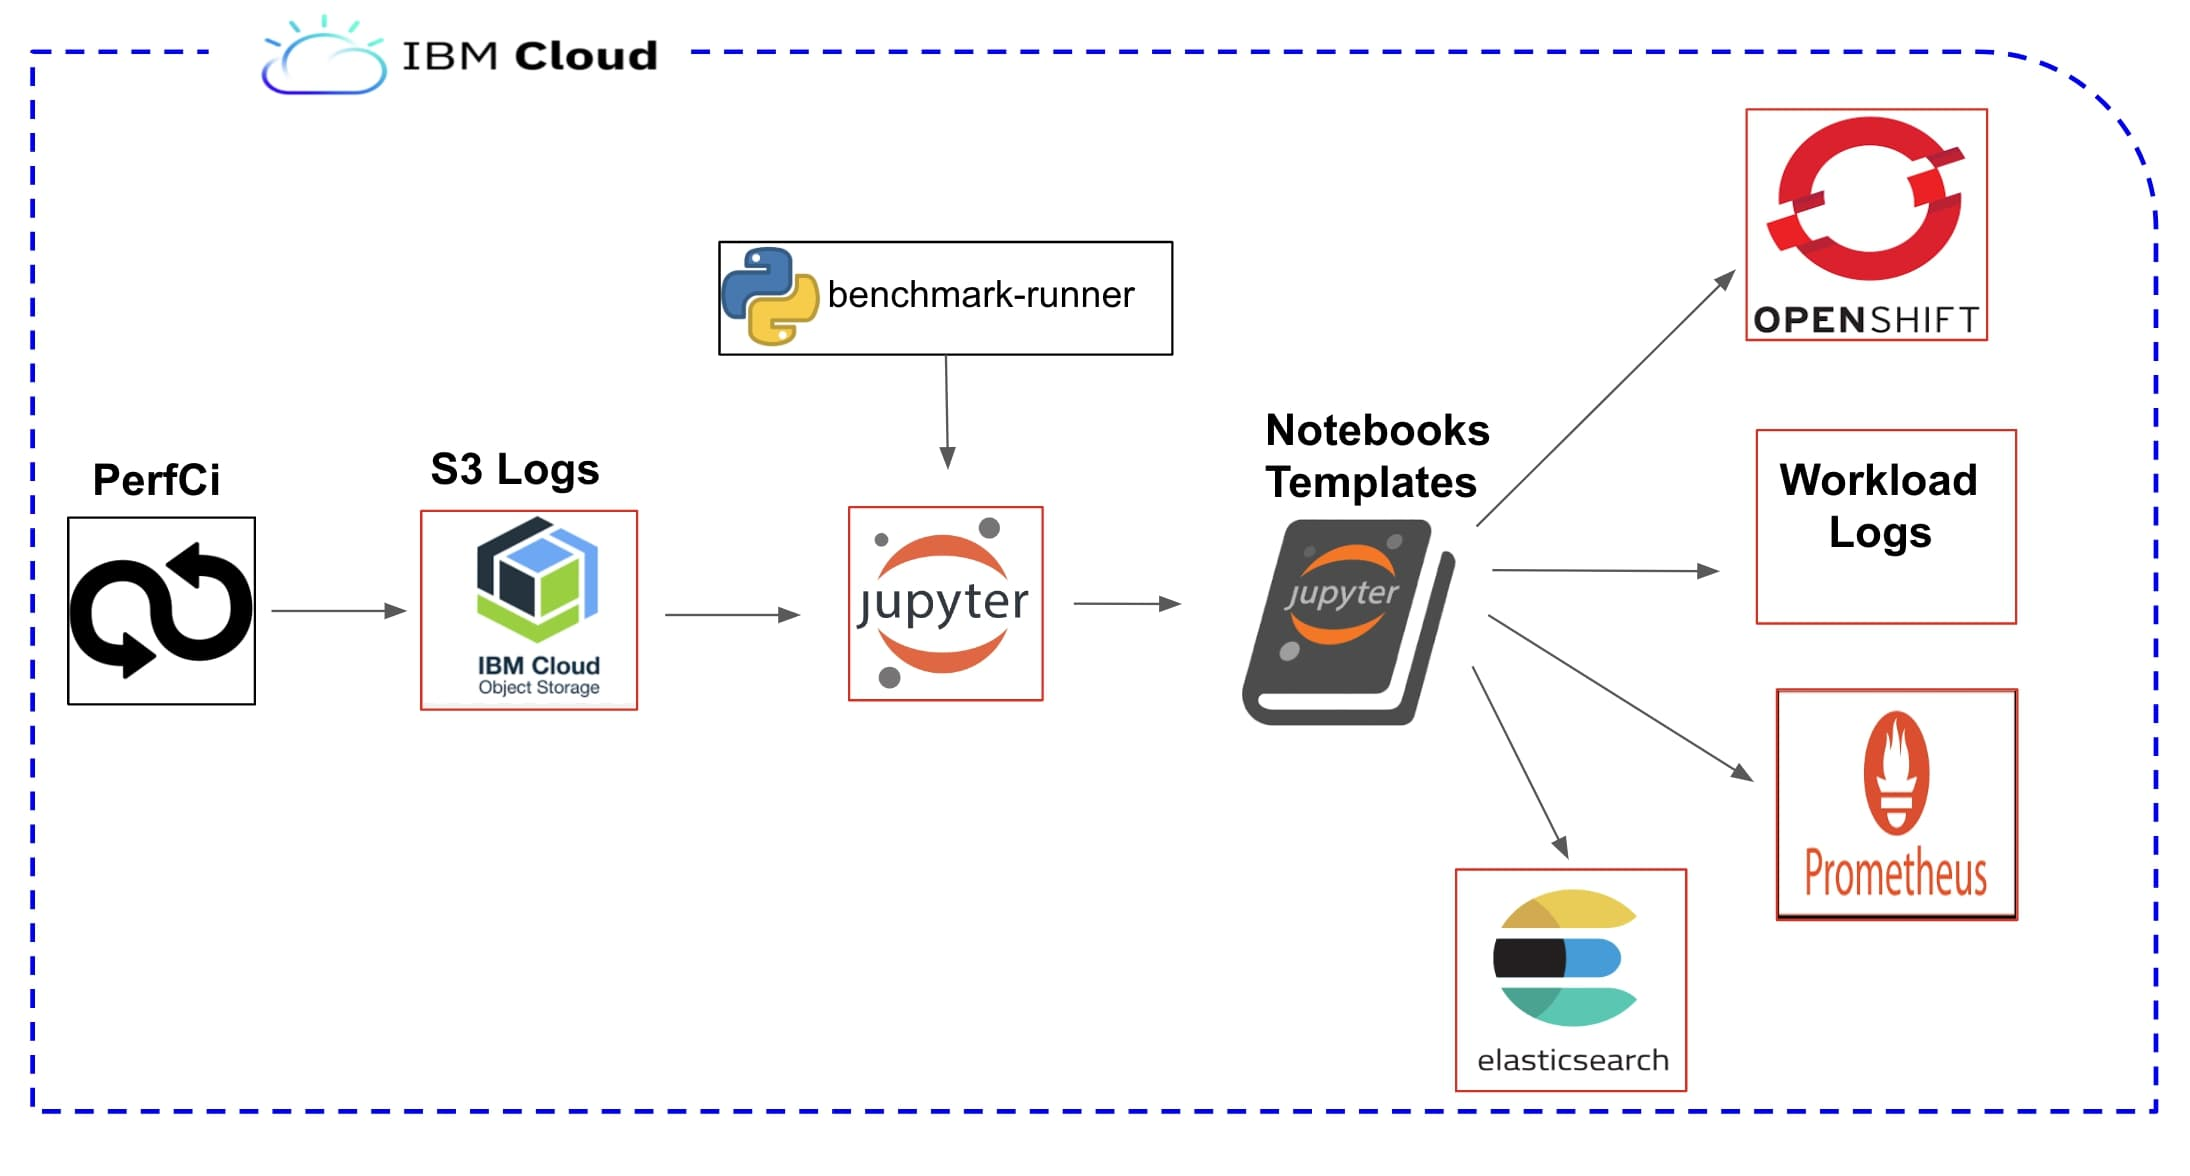

In [20]:
from IPython.display import Image
Image("img/perfci.jpg")

## * [PerfCi Templates](https://github.com/redhat-performance/benchmark-runner/tree/main/benchmark_runner/jupyterlab/templates)

## * [Run on Binder](https://mybinder.org/v2/gh/ebattat/JupyterLab_presentation/main?labpath=presentation.ipynb)